In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split, KFold
from sklearn.metrics import r2_score, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [69]:
# Load Data

df = pd.read_csv("data_processed.csv")

df.head(10)

,ID,Player,Win,Game,PA,AB,Run,H,2B,3B,...,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
0,aaronha01,Henry Aaron(1954~1976),1692,3234,13666,12121,2128,3703,614,96,...,0.007025,0.054149,0.100395,0.017562,0.002342,0.008781,15.799,2219,0.007120,0.911988
1,aaronto01,Tommie Aaron(1962~1971),161,373,1045,944,99,216,42,6,...,0.005742,0.012440,0.081340,0.008612,0.000000,0.005742,-4.792,211,-0.022711,0.739198
2,abbotje01,Jeff Abbott(1997~2001),98,212,651,596,82,157,33,2,...,0.003072,0.027650,0.058372,0.009217,0.004608,0.010753,0.294,84,0.003500,0.855905
3,abbotku01,Kurt Abbott(1993~2001),308,665,2227,2044,268,523,109,23,...,0.010328,0.027840,0.059722,0.008981,0.007634,0.005388,-0.154,341,-0.000452,0.797247
4,abercre01,Reggie Abercrombie(2006~2008),63,140,421,386,56,86,20,2,...,0.004751,0.021378,0.049881,0.033254,0.016627,0.004751,-1.036,34,-0.030471,0.750012
5,abernbr01,Brent Abernathy(2001~2005),91,230,955,868,97,212,36,5,...,0.005236,0.008377,0.062827,0.021990,0.007330,0.004188,-3.129,176,-0.017778,0.908542
6,aberscl01,Cliff Aberson(1947~1949),24,63,205,179,25,45,7,3,...,0.014634,0.024390,0.126829,0.000000,0.000000,0.000000,0.255,20,0.012750,0.791516
7,abnersh01,Shawn Abner(1987~1992),157,323,902,840,81,191,39,4,...,0.004435,0.012195,0.047672,0.006652,0.007761,0.007761,-1.557,154,-0.010110,0.659326
8,abramca01,Cal Abrams(1949~1956),194,546,1943,1612,255,433,64,19,...,0.009779,0.016469,0.156974,0.006176,0.003603,0.001544,-0.594,248,-0.002395,0.825599
9,abreubo01,Bobby Abreu(1996~2014),1226,2412,10081,8480,1453,2470,574,59,...,0.005853,0.028569,0.146414,0.039579,0.003273,0.008432,7.156,1598,0.004478,0.884320


In [70]:
print(df.columns)

Index(['ID', 'Player', 'Win', 'Game', 'PA', 'AB', 'Run', 'H', '2B', '3B', 'HR',
       'BB', 'SF', 'HBP', 'SB', 'Date_min', 'Date_max', '1B', 'XBH', 'AVG',
       'SLG', 'OBP', 'OPS', 'Hard_Hit_Efficiency', 'Speed_Score',
       'Runs_per_PA', '1B_per_PA', '2B_per_PA', '3B_per_PA', 'HR_per_PA',
       'BB_per_PA', 'SB_per_PA', 'HBP_per_PA', 'SF_per_PA', 'WPA_total',
       'High_Leverage_PA_total', 'WPA_per_High_Leverage_PA',
       'Hits_Rolling_Std'],
      dtype='object')


In [71]:
# Classify Columns

id = ["ID", "Player"]
y = ["Runs_per_PA"]
exclude = ["XBH", "HBP", "Run", "Win", "Game", "Date_min", "Date_max", "PA", "AB", "H", "1B", "2B", "3B", "HR", "BB", "SF", "SB", "WPA_total", "High_Leverage_PA_total"]

In [74]:
# Choose attributes

y_data = df.loc[:, y]
x_data = df.drop(columns=id + y + exclude)

n_x = len(x_data.columns)

x_data.head(10)

,AVG,SLG,OBP,OPS,Hard_Hit_Efficiency,Speed_Score,1B_per_PA,2B_per_PA,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_per_High_Leverage_PA,Hits_Rolling_Std
0,0.305503,0.555152,0.374276,0.929429,0.119627,0.069516,0.164862,0.044929,0.007025,0.054149,0.100395,0.017562,0.002342,0.008781,0.007120,0.911988
1,0.228814,0.327331,0.290821,0.618152,0.064619,0.054545,0.148325,0.040191,0.005742,0.012440,0.081340,0.008612,0.000000,0.005742,-0.022711,0.739198
2,0.263423,0.416107,0.307453,0.723561,0.088926,0.062980,0.159754,0.050691,0.003072,0.027650,0.058372,0.009217,0.004608,0.010753,0.003500,0.855905
3,0.255871,0.422701,0.305077,0.727778,0.094912,0.068253,0.147732,0.048945,0.010328,0.027840,0.059722,0.008981,0.007634,0.005388,-0.000452,0.797247
4,0.222798,0.354922,0.274038,0.628961,0.080311,0.085511,0.130641,0.047506,0.004751,0.021378,0.049881,0.033254,0.016627,0.004751,-0.030471,0.750012
5,0.244240,0.324885,0.297125,0.622009,0.056452,0.064921,0.170681,0.037696,0.005236,0.008377,0.062827,0.021990,0.007330,0.004188,-0.017778,0.908542
6,0.251397,0.407821,0.346341,0.754163,0.083799,0.048780,0.146341,0.034146,0.014634,0.024390,0.126829,0.000000,0.000000,0.000000,0.012750,0.791516
7,0.227381,0.322619,0.268673,0.591292,0.064286,0.054324,0.151885,0.043237,0.004435,0.012195,0.047672,0.006652,0.007761,0.007761,-0.010110,0.659326
8,0.268610,0.391439,0.386611,0.778051,0.071340,0.048893,0.163664,0.032939,0.009779,0.016469,0.156974,0.006176,0.003603,0.001544,-0.002395,0.825599
9,0.291274,0.474764,0.394977,0.869741,0.108608,0.102371,0.153655,0.056939,0.005853,0.028569,0.146414,0.039579,0.003273,0.008432,0.004478,0.884320


In [57]:
# Correlation Matrix

cor_matrix = x_data.corr()
n_attributes = len(x_data.columns)

cor_matrix.head(n_attributes)

,AVG,SLG,OBP,OPS,Hard_Hit_Efficiency,Speed_Score,1B_per_PA,2B_per_PA,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_per_High_Leverage_PA,Hits_Rolling_Std
AVG,1.000000,0.680281,0.801099,0.786153,0.404372,0.462004,0.708805,0.466357,0.315998,0.095526,0.044426,0.149264,-0.028042,-0.068070,0.335759,0.737423
SLG,0.680281,1.000000,0.664393,0.957445,0.911738,0.377611,0.005192,0.602806,0.141726,0.764832,0.221869,-0.013247,0.144630,0.171773,0.333588,0.539893
OBP,0.801099,0.664393,1.000000,0.851826,0.459896,0.348897,0.369573,0.360154,0.222758,0.210912,0.617473,0.111793,0.089106,-0.059147,0.383603,0.551574
OPS,0.786153,0.957445,0.851826,1.000000,0.816614,0.399392,0.146356,0.561573,0.185355,0.617501,0.393951,0.033886,0.135778,0.097551,0.381940,0.591399
Hard_Hit_Efficiency,0.404372,0.911738,0.459896,0.816614,1.000000,0.392064,-0.337236,0.744147,0.070882,0.804292,0.230908,-0.081182,0.197754,0.222363,0.244927,0.345382
Speed_Score,0.462004,0.377611,0.348897,0.399392,0.392064,1.000000,0.184964,0.547423,0.427552,-0.013625,-0.032015,0.773115,0.054410,-0.039493,0.183588,0.429178
1B_per_PA,0.708805,0.005192,0.369573,0.146356,-0.337236,0.184964,1.000000,-0.057134,0.267688,-0.499777,-0.286236,0.204190,-0.196688,-0.236846,0.130917,0.499965
2B_per_PA,0.466357,0.602806,0.360154,0.561573,0.744147,0.547423,-0.057134,1.000000,-0.000568,0.286370,-0.017740,-0.049121,0.121702,0.109066,0.150061,0.371527
3B_per_PA,0.315998,0.141726,0.222758,0.185355,0.070882,0.427552,0.267688,-0.000568,1.000000,-0.239315,-0.033700,0.240124,-0.129242,-0.277856,0.106498,0.254344
HR_per_PA,0.095526,0.764832,0.210912,0.617501,0.804292,-0.013625,-0.499777,0.286370,-0.239315,1.000000,0.222127,-0.163240,0.211042,0.322834,0.170071,0.117345


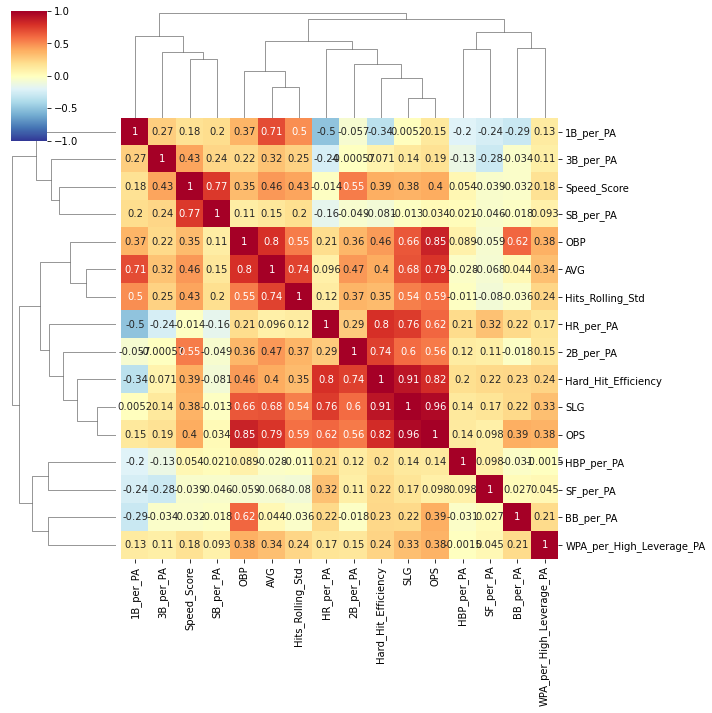

In [58]:
# Correaltion Plot

sns.clustermap(cor_matrix, annot = True, cmap = 'RdYlBu_r', vmin = -1, vmax = 1)


In [59]:
# Scaler

scaler = StandardScaler()
scaler.fit(x_data)
scaled_x_data = pd.DataFrame(scaler.transform(x_data), columns=x_data.columns)

scaled_x_data.head(10)

,AVG,SLG,OBP,OPS,Hard_Hit_Efficiency,Speed_Score,1B_per_PA,2B_per_PA,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_per_High_Leverage_PA,Hits_Rolling_Std
0,1.787108,2.798714,1.621085,2.587567,2.149112,0.603485,0.194205,0.514348,0.139064,2.600777,0.670421,0.361770,-0.691372,0.895761,1.170251,1.231688
1,-0.649825,-0.624075,-0.654555,-0.690168,-0.304038,-0.184549,-0.395294,0.087312,-0.131376,-0.427270,0.001731,-0.273281,-1.054536,0.191382,-1.332711,-0.454981
2,0.449943,0.709707,-0.201032,0.419786,0.779978,0.259450,0.012130,1.033738,-0.694012,0.676941,-0.804257,-0.230410,-0.339819,1.352735,0.866524,0.684248
3,0.209966,0.808763,-0.265830,0.464189,1.046918,0.537035,-0.416433,0.876315,0.835250,0.690762,-0.756888,-0.247149,0.129384,0.109523,0.534963,0.111660
4,-0.840982,-0.209537,-1.112186,-0.576350,0.395771,1.445473,-1.025707,0.746624,-0.340256,0.221589,-1.102205,1.475300,1.524216,-0.038298,-1.983790,-0.349418
5,-0.159635,-0.660819,-0.482676,-0.649548,-0.668254,0.361648,0.401643,-0.137585,-0.238031,-0.722259,-0.647906,0.675960,0.082275,-0.168571,-0.918848,1.198049
6,0.067791,0.585216,0.859362,0.742023,0.551322,-0.488019,-0.466017,-0.457571,1.742900,0.440300,1.598044,-0.884421,-1.054536,-1.139285,1.642649,0.055720
7,-0.695349,-0.694860,-1.258481,-0.972997,-0.318885,-0.196221,-0.268408,0.361857,-0.406860,-0.445062,-1.179737,-0.412402,0.149072,0.659279,-0.275460,-1.234632
8,0.614788,0.339093,1.957434,0.993561,-0.004295,-0.482072,0.151524,-0.566419,0.719516,-0.134752,2.655869,-0.446170,-0.495784,-0.781450,0.371889,0.388418
9,1.334949,1.590965,2.185553,1.959063,1.657728,2.332996,-0.205285,1.596873,-0.107988,0.743648,2.285310,1.924140,-0.546840,0.814828,0.948592,0.961614


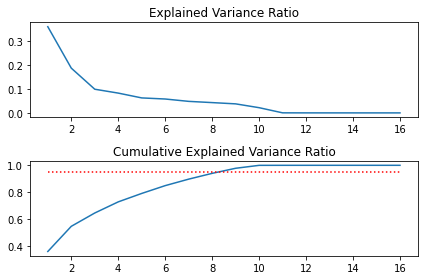

In [60]:
# PCA

threshold_PCA = 0.95

pca0 = PCA()
pca0.fit(scaled_x_data)
explained_variance_ratio_0 = pca0.explained_variance_ratio_

cumulative_explained_variance_ratio_0 = []
cur = 0
for i in range(n_attributes):
    cur += explained_variance_ratio_0[i]
    cumulative_explained_variance_ratio_0.append(cur)

plt.subplot(2, 1, 1)
plt.plot(range(1, n_attributes + 1), explained_variance_ratio_0)
plt.title("Explained Variance Ratio")
plt.subplot(2, 1, 2)
plt.plot(range(1, n_attributes + 1), cumulative_explained_variance_ratio_0)
plt.plot(range(1, n_attributes + 1), [threshold_PCA] * n_attributes, "r:")
plt.title("Cumulative Explained Variance Ratio")

plt.tight_layout()
plt.show()

In [61]:
# PCA limited

n_comp = 0
cur = 0
for i in range(n_attributes):
    cur += explained_variance_ratio_0[i]
    n_comp += 1
    if cur > threshold_PCA:
        break

pca1 = PCA(n_components=n_comp)
pca1.fit(scaled_x_data)
explained_variance_ratio_1 = pca1.explained_variance_ratio_

print(explained_variance_ratio_1)

x_pca = pd.DataFrame(pca1.transform(scaled_x_data), columns=["PC" + str(i) for i in range(n_comp)])

x_pca.head(10)

[0.36006425 0.18695231 0.09887583 0.08267421 0.06257386 0.05799008
 0.04816138 0.04299618 0.037716  ]


,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,5.577391,-1.264452,-0.607412,-0.003275,-0.306316,-1.249242,0.207309,-1.133630,-0.916620
1,-1.668176,-0.208061,0.249063,-0.182156,0.764046,-0.753638,-1.133195,0.028335,0.207227
2,1.488627,-0.839570,0.575569,-1.275001,-0.876680,-1.208997,0.382335,0.395351,0.047230
3,1.444013,-0.572009,0.975566,-0.562064,0.754491,-0.328423,0.982574,-0.098853,0.320239
4,-0.779223,-0.591762,3.509456,-0.120527,0.248516,1.245149,-1.012090,-0.142274,-0.399035
5,-0.930253,1.328338,0.835222,-0.580683,-0.315862,0.295024,-0.736719,-0.112329,-0.507100
6,1.379627,-0.099569,-2.053769,1.618699,1.693966,-0.607782,1.454894,-0.196848,0.222533
7,-2.088435,-0.604543,1.037544,-0.912125,-0.179914,-0.304466,0.281865,0.493337,0.677867
8,1.616136,0.374124,-2.695987,1.926028,0.616287,0.357879,-0.616738,-0.149502,0.283863
9,5.164187,-0.018301,0.640712,2.273237,-0.673189,-0.961674,-1.321073,0.776074,-0.078008


In [62]:
# Split data

x_train, x_test, y_train, y_test = train_test_split(x_pca, y_data, test_size=0.3, shuffle=True, random_state=195)


In [63]:
# KFold

n_s = 10
kf = KFold(n_splits=n_s, shuffle=True, random_state=195)


In [64]:
# Simple linear regresssion

model_lm = LinearRegression()
model_lm_best = LinearRegression()
r2_best = 0

for i, (train_idx, validation_idx) in enumerate(kf.split(x_train)):
    x_t, x_v = x_train.iloc[train_idx], x_train.iloc[validation_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[validation_idx]
    model_lm.fit(x_t, y_t)
    
    r2_train = r2_score(y_t, model_lm.predict(x_t))
    r2_validation = r2_score(y_v, model_lm.predict(x_v))
    print(f"R_squared for fold {i}: {r2_train:.4f}(train) / {r2_validation:.4f}(validation)")
    
    if r2_validation > r2_best:
        r2_best = r2_validation
        model_lm_best.fit(x_t, y_t)

r2_test = r2_score(y_test, model_lm_best.predict(x_test))
print("======================================")
print(f"R_squared of test data: {r2_test:.4f}")


R_squared for fold 0: 0.6475(train) / 0.6347(validation)
R_squared for fold 1: 0.6510(train) / 0.5993(validation)
R_squared for fold 2: 0.6449(train) / 0.6588(validation)
R_squared for fold 3: 0.6476(train) / 0.6349(validation)
R_squared for fold 4: 0.6513(train) / 0.5945(validation)
R_squared for fold 5: 0.6484(train) / 0.6255(validation)
R_squared for fold 6: 0.6389(train) / 0.7054(validation)
R_squared for fold 7: 0.6416(train) / 0.6899(validation)
R_squared for fold 8: 0.6525(train) / 0.5860(validation)
R_squared for fold 9: 0.6416(train) / 0.6876(validation)
R_squared of test data: 0.6267


In [66]:
# Finding Coefficients from Linear Regression

coef = model_lm_best.coef_
rot = np.transpose(pca1.components_)
scale = scaler.scale_

coef_before_pca = np.matmul(rot, np.transpose(coef))
coef_original = np.array([coef_before_pca[i][0] / scale[i] for i in range(n_x)])

print(coef_original)

[ 0.04522321  0.04772393  0.0689011   0.03371833  0.09105201  0.16471635
 -0.01284538 -0.16506131  0.39883295  0.25237509  0.07748816  0.35640585
  0.12274378 -0.35011265  0.01366658  0.0246655 ]


In [28]:
# Random forest

model_rf = RandomForestRegressor(n_estimators=200)
model_rf_best = RandomForestRegressor(n_estimators=200)
r2_best = 0

for i, (train_idx, validation_idx) in enumerate(kf.split(x_train)):
    x_t, x_v = x_train.iloc[train_idx], x_train.iloc[validation_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[validation_idx]
    model_rf.fit(x_t, np.ravel(y_t))
    
    r2_train = r2_score(y_t, model_rf.predict(x_t))
    r2_validation = r2_score(y_v, model_rf.predict(x_v))
    print(f"R_squared for fold {i}: {r2_train:.4f}(train) / {r2_validation:.4f}(validation)")
    
    if r2_validation > r2_best:
        r2_best = r2_validation
        model_rf_best.fit(x_t, np.ravel(y_t))

r2_test = r2_score(y_test, model_rf_best.predict(x_test))
print("======================================")
print(f"R_squared of test data: {r2_test:.4f}")


R_squared for fold 0: 0.9482(train) / 0.6316(validation)
R_squared for fold 1: 0.9488(train) / 0.5801(validation)
R_squared for fold 2: 0.9482(train) / 0.6497(validation)
R_squared for fold 3: 0.9490(train) / 0.6365(validation)
R_squared for fold 4: 0.9498(train) / 0.5374(validation)
R_squared for fold 5: 0.9489(train) / 0.6032(validation)
R_squared for fold 6: 0.9479(train) / 0.6570(validation)
R_squared for fold 7: 0.9480(train) / 0.6714(validation)
R_squared for fold 8: 0.9489(train) / 0.5831(validation)
R_squared for fold 9: 0.9476(train) / 0.6687(validation)
R_squared of test data: 0.6112


In [49]:
# Hyper Parameter Tuning
'''
param_grid = {'n_estimators': [32, 128, 512], 'max_depth': [2, 8, 32], 'max_features': [0.3, 0.6, 1]}
gscv_rf = GridSearchCV(RandomForestRegressor(), param_grid)
gscv_rf.fit(x_train, np.ravel(y_train))
'''

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 8, 32], 'max_features': [0.3, 0.6, 1],
                         'n_estimators': [32, 128, 512]})

In [50]:
# Hyper Parameter Tuning: Result

print(gscv_rf.best_params_)
print(gscv_rf.best_score_)

r2_train = r2_score(y_train, gscv_rf.predict(x_train))
r2_test = r2_score(y_test, gscv_rf.predict(x_test))
print(f"R_squared of train data: {r2_train:.4f}")
print(f"R_squared of test data: {r2_test:.4f}")

{'max_depth': 32, 'max_features': 0.6, 'n_estimators': 512}
0.6254222955195271
R_squared of train data: 0.9493
R_squared of test data: 0.6066


In [78]:
# Expected Runs per PA

expected_lm = model_lm_best.predict(x_pca)
expected_rf = model_rf_best.predict(x_pca)
coef_checker = np.matmul(x_data, np.transpose(coef_original))

df_res = deepcopy(df)

df_res["Expected_Runs_per_PA_lm"] = expected_lm
df_res["Expected_Runs_per_PA_rf"] = expected_rf
df_res["Coef_check"] = coef_checker
df_res["intercept"] = df_res["Expected_Runs_per_PA_lm"] - df_res["Coef_check"]

df_res.loc[:, ["Player", "Runs_per_PA", "Expected_Runs_per_PA_lm", "Expected_Runs_per_PA_rf", "Coef_check", "intercept"]].head(30)

,Player,Runs_per_PA,Expected_Runs_per_PA_lm,Expected_Runs_per_PA_rf,Coef_check,intercept
0,Henry Aaron(1954~1976),0.155715,0.150062,0.154964,0.160557,-0.010495
1,Tommie Aaron(1962~1971),0.094737,0.093398,0.094928,0.103893,-0.010495
2,Jeff Abbott(1997~2001),0.125960,0.108881,0.119519,0.119375,-0.010495
3,Kurt Abbott(1993~2001),0.120341,0.114399,0.111289,0.124894,-0.010495
4,Reggie Abercrombie(2006~2008),0.133017,0.109954,0.119034,0.120449,-0.010495
5,Brent Abernathy(2001~2005),0.101571,0.103428,0.101528,0.113922,-0.010495
6,Cliff Aberson(1947~1949),0.121951,0.119296,0.122014,0.129790,-0.010495
7,Shawn Abner(1987~1992),0.089800,0.084619,0.080251,0.095113,-0.010495
8,Cal Abrams(1949~1956),0.131240,0.122870,0.129106,0.133365,-0.010495
9,Bobby Abreu(1996~2014),0.144133,0.151574,0.147910,0.162069,-0.010495


In [30]:
df.to_csv(path_or_buf="Result.csv", index=False)

In [31]:
print(f"R_squared_Linear: {r2_score(y_data, expected_lm):.4f}")
print(f"R_squared_RF: {r2_score(y_data, expected_rf):.4f}")

R_squared_Linear: 0.6403
R_squared_RF: 0.8285


In [79]:
for i in range(n_x):
    print(f"Coefficient for {x_data.columns[i]}: {coef_original[i]:.4f}")

Coefficient for AVG: 0.0452
Coefficient for SLG: 0.0477
Coefficient for OBP: 0.0689
Coefficient for OPS: 0.0337
Coefficient for Hard_Hit_Efficiency: 0.0911
Coefficient for Speed_Score: 0.1647
Coefficient for 1B_per_PA: -0.0128
Coefficient for 2B_per_PA: -0.1651
Coefficient for 3B_per_PA: 0.3988
Coefficient for HR_per_PA: 0.2524
Coefficient for BB_per_PA: 0.0775
Coefficient for SB_per_PA: 0.3564
Coefficient for HBP_per_PA: 0.1227
Coefficient for SF_per_PA: -0.3501
Coefficient for WPA_per_High_Leverage_PA: 0.0137
Coefficient for Hits_Rolling_Std: 0.0247
